In [99]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [100]:
%matplotlib inline

In [15]:
list_path1 = '/Users/wcheung/Dropbox/delta-analytics/data-06Jan2019/word_lists-06Jan2019'
list_path2 = '/Users/wcheung/Dropbox/delta-analytics/data-06Jan2019/listed_words-06Jan2019'
list_path3 = '/Users/wcheung/Dropbox/delta-analytics/data-06Jan2019/allTags-06Jan2019'
list_path4 = '/Users/wcheung/Dropbox/delta-analytics/data-06Jan2019/allTaggedItems-06Jan2019'

In [22]:
strs1 = '[' + ','.join([l.strip() for l in open(list_path1).readlines()]) + ']'
df1 = pd.read_json(strs1)

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45129 entries, 0 to 45128
Data columns (total 11 columns):
_id                  45129 non-null object
createdAt            45129 non-null object
createdBy            45129 non-null object
creatorId            45129 non-null object
description          44093 non-null object
lastActivityAt       45129 non-null object
name                 45129 non-null object
numberWordsInList    45129 non-null object
permalink            45129 non-null object
type                 45129 non-null int64
updatedAt            45129 non-null object
dtypes: int64(1), object(10)
memory usage: 5.4+ MB


In [59]:
df1.shape

(45129, 11)

In [62]:
df1.createdBy.nunique()

19755

In [61]:
df1.createdBy.value_counts()

biocon                 1055
ruzuzu                  759
fbharjo                 549
hap_e_wordnik           517
gulyasrobi              385
kalayzich               348
hernesheir              345
chained_bear            269
sionnach                267
actung                  247
alexz                   213
bilby                   210
reesetee                184
madmouth                178
marky                   170
mollusque               150
johnbrasil              144
lampbane                139
trivet                  132
whichbe                 128
pterodactyl             125
uselessness             118
palooka                 117
gangerh                 116
erinmckean              113
oroboros                109
slumry                  103
TankHughes               97
rolig                    95
yarb                     90
                       ... 
akyanks100                1
srdstl                    1
indifferentconsumer       1
travisdiener554359h       1
sdeniz              

In [68]:
df1.description.value_counts()

                                                                                                                                                                                                                             23695
test-list                                                                                                                                                                                                                       80
test                                                                                                                                                                                                                            27
from phrontistery.info                                                                                                                                                                                                          26
Main List                                                                                   

In [23]:
df1.head()

,_id,createdAt,createdBy,creatorId,description,lastActivityAt,name,numberWordsInList,permalink,type,updatedAt
0,{u'$numberLong': u'1'},{u'$date': u'2006-11-24T21:06:52.000Z'},john,{u'$numberLong': u'1000438'},,{u'$date': u'2017-04-14T00:13:38.359Z'},some words,{u'$numberLong': u'580'},some-words,0,{u'$date': u'2011-08-01T17:34:16.000Z'}
1,{u'$numberLong': u'2'},{u'$date': u'2006-11-24T21:49:02.000Z'},msc,{u'$numberLong': u'1010651'},,{u'$date': u'2013-03-03T17:54:21.714Z'},msc's Words,{u'$numberLong': u'225'},msc-s-words,0,{u'$date': u'2006-11-24T21:49:02.000Z'}
2,{u'$numberLong': u'3'},{u'$date': u'2006-11-25T16:17:22.000Z'},kad,{u'$numberLong': u'1004989'},,{u'$date': u'2006-11-25T16:17:22.000Z'},kad's Words,{u'$numberLong': u'109'},kad-s-words,0,{u'$date': u'2006-11-25T16:17:22.000Z'}
3,{u'$numberLong': u'4'},{u'$date': u'2006-11-27T00:12:05.000Z'},john,{u'$numberLong': u'1000438'},,{u'$date': u'2006-11-27T00:12:05.000Z'},Ruby Reserved Words,{u'$numberLong': u'38'},ruby-reserved-words,0,{u'$date': u'2006-11-27T00:12:05.000Z'}
4,{u'$numberLong': u'5'},{u'$date': u'2006-11-27T13:38:57.000Z'},sdb,{u'$numberLong': u'1010652'},,{u'$date': u'2006-11-27T13:38:57.000Z'},sdb's Words,{u'$numberLong': u'4'},sdb-s-words,0,{u'$date': u'2006-11-27T13:38:57.000Z'}


In [87]:
df1_ = df1.copy()
for c in df1_.columns:
    df1_[c] = df1_[c].apply(lambda x: x.values()[0] if type(x) == dict else x)

In [91]:
df1_.head()

,_id,createdAt,createdBy,creatorId,description,lastActivityAt,name,numberWordsInList,permalink,type,updatedAt
0,1,2006-11-24T21:06:52.000Z,john,1000438,,2017-04-14T00:13:38.359Z,some words,580,some-words,0,2011-08-01T17:34:16.000Z
1,2,2006-11-24T21:49:02.000Z,msc,1010651,,2013-03-03T17:54:21.714Z,msc's Words,225,msc-s-words,0,2006-11-24T21:49:02.000Z
2,3,2006-11-25T16:17:22.000Z,kad,1004989,,2006-11-25T16:17:22.000Z,kad's Words,109,kad-s-words,0,2006-11-25T16:17:22.000Z
3,4,2006-11-27T00:12:05.000Z,john,1000438,,2006-11-27T00:12:05.000Z,Ruby Reserved Words,38,ruby-reserved-words,0,2006-11-27T00:12:05.000Z
4,5,2006-11-27T13:38:57.000Z,sdb,1010652,,2006-11-27T13:38:57.000Z,sdb's Words,4,sdb-s-words,0,2006-11-27T13:38:57.000Z


In [93]:
df1_.creatorId.nunique()

19760

In [106]:
wordcount = pd.to_numeric(df1_.numberWordsInList)

In [107]:
wordcount.describe()

count     45129.000000
mean         48.259124
std         705.201602
min           0.000000
25%           2.000000
50%           8.000000
75%          28.000000
max      110098.000000
Name: numberWordsInList, dtype: float64

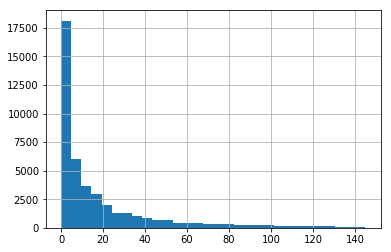

In [112]:
wordcount[wordcount<wordcount.quantile(0.95)].hist(bins=30)

In [24]:
strs2 = '[' + ','.join([l.strip() for l in open(list_path2).readlines()]) + ']'
df2 = pd.read_json(strs2)

In [26]:
df2.head()

,_id,createdAt,createdBy,creatorId,lcword,word,wordId,wordListId
0,{u'$numberLong': u'1'},{u'$date': u'2006-11-24T21:31:02.000Z'},john,{u'$numberLong': u'1000438'},phatic,phatic,{u'$numberLong': u'313110'},{u'$numberLong': u'1'}
1,{u'$numberLong': u'2'},{u'$date': u'2006-11-24T21:31:06.000Z'},john,{u'$numberLong': u'1000438'},macerate,macerate,{u'$numberLong': u'96751'},{u'$numberLong': u'1'}
2,{u'$numberLong': u'3'},{u'$date': u'2006-11-24T21:31:40.000Z'},john,{u'$numberLong': u'1000438'},amanuenses,amanuenses,{u'$numberLong': u'240510'},{u'$numberLong': u'1'}
3,{u'$numberLong': u'4'},{u'$date': u'2006-11-24T21:31:57.000Z'},john,{u'$numberLong': u'1000438'},theophagy,theophagy,{u'$numberLong': u'7006217'},{u'$numberLong': u'1'}
4,{u'$numberLong': u'5'},{u'$date': u'2006-11-24T21:32:04.000Z'},john,{u'$numberLong': u'1000438'},seraglio,seraglio,{u'$numberLong': u'86501'},{u'$numberLong': u'1'}


In [28]:
(df2.wordListId=={u'$numberLong': u'1'}).sum()

580

In [89]:
df2_ = df2.copy()
for c in df2_.columns:
    df2_[c] = df2_[c].apply(lambda x: x.values()[0] if type(x) == dict else x)

In [90]:
df2_.head()

,_id,createdAt,createdBy,creatorId,lcword,word,wordId,wordListId
0,1,2006-11-24T21:31:02.000Z,john,1000438,phatic,phatic,313110,1
1,2,2006-11-24T21:31:06.000Z,john,1000438,macerate,macerate,96751,1
2,3,2006-11-24T21:31:40.000Z,john,1000438,amanuenses,amanuenses,240510,1
3,4,2006-11-24T21:31:57.000Z,john,1000438,theophagy,theophagy,7006217,1
4,5,2006-11-24T21:32:04.000Z,john,1000438,seraglio,seraglio,86501,1


In [120]:
df2.lcword.value_counts()

schadenfreude                    606
ephemeral                        549
lugubrious                       548
quixotic                         541
mellifluous                      533
smol                             533
sanguine                         530
loquacious                       516
laconic                          479
serendipity                      479
obsequious                       471
ennui                            470
inchoate                         466
capricious                       447
esoteric                         434
halcyon                          420
verisimilitude                   418
alacrity                         414
egregious                        404
ubiquitous                       402
plethora                         398
erudite                          386
ersatz                           384
taciturn                         379
love                             377
obstreperous                     377
zeitgeist                        370
p

In [122]:
df2_[df2_.lcword=='schadenfreude'].creatorId.value_counts()

1009739    9
1027036    5
1008934    3
1106819    3
1022612    2
1055410    2
1023530    2
1077331    2
1003367    2
1162513    2
1054064    2
1011735    2
1011232    2
1082451    2
1008816    2
1011329    2
1018182    2
1012249    2
1012015    2
1100442    2
1088330    2
1016328    2
1011184    2
1109718    2
1011157    2
1019681    2
1011765    2
1018799    2
1015095    2
1076881    2
          ..
1018357    1
1016857    1
1017219    1
1012725    1
1014635    1
1018458    1
1021391    1
1052227    1
1011949    1
1024010    1
1011436    1
1068048    1
1011433    1
1012432    1
1011347    1
1010749    1
1016128    1
1052335    1
1014687    1
1014681    1
1017524    1
1080094    1
1017034    1
1013310    1
1024414    1
1012242    1
1022239    1
1012939    1
1022257    1
1017748    1
Name: creatorId, Length: 558, dtype: int64

In [114]:
import gensim

In [117]:
model = gensim.models.Word2Vec(list(df2_.lcword), min_count=1)

In [119]:
df2_['vector'] = df2_.lcword.apply(lambda x: np.mean(np.array([model.wv[i] for i in x]), axis = 0))

In [124]:
df2_.loc[0,'vector']

array([-1.0315042 ,  0.61762285,  0.23254013,  0.7297805 ,  0.10700822,
       -0.6362435 , -0.2707728 ,  0.17733163, -0.7675016 , -0.2884957 ,
       -0.07895869,  0.10746787, -0.12875587,  0.05224638,  0.04499739,
       -0.210494  , -0.16473706, -0.24289997,  0.387754  , -0.23114999,
        0.13059205,  0.05270008, -0.01639573,  0.484524  , -0.08882379,
        0.13265437, -0.01011539,  0.3004836 , -0.06568984, -0.4486668 ,
        0.45538223, -0.13844864, -0.3320774 ,  0.5408246 ,  0.5452989 ,
        0.21689735,  0.10405157, -0.0131946 ,  0.20511733, -0.2371202 ,
       -0.79057217, -0.07342868, -0.27121934,  0.19536458, -0.2508159 ,
        0.28887793, -0.21269186,  0.09800708,  0.23893894,  0.46526745,
        0.5314409 ,  0.01769962, -0.21780361, -0.22021931, -0.12944534,
        0.66211283, -0.48332313, -0.32770625,  0.41780865, -0.258859  ,
        0.07250875,  0.0798997 , -0.29645368,  0.46548176, -0.57619876,
       -0.52744454,  0.20264931, -0.55611354, -0.45425704,  0.35

In [137]:
strs3[:1000]

'[{"_id":"23835","name":"hector","count":1},{"_id":"23834","name":"phantasmagorian","count":1},{"_id":"23833","name":"sin","count":1},{"_id":"23832","name":"feb 25","count":1},{"_id":"23831","name":"Jolly Roger Bradfield","count":1},{"_id":"23830","name":"pickle-chiffon","count":1},{"_id":"23829","name":"pretentiously unpretentious","count":1},{"_id":"23828","name":"yarn","count":1},{"_id":"23827","name":"jeckle","count":1},{"_id":"23826","name":"alpheid shrimp","count":1},{"_id":"23825","name":"Alpheidae","count":1},{"_id":"23824","name":"to you and you and you","count":1},{"_id":"23823","name":"adieu","count":1},{"_id":"23822","name":"smash it and bang it","count":1},{"_id":"23821","name":"deathtrap","count":1},{"_id":"23820","name":"stephascope","count":1},{"_id":"23819","name":"what is the term for an intentional mis-spelling?","count":1},{"_id":"23818","name":"tolkien too?","count":1},{"_id":"23817","name":"bookhouse","count":1},{"_id":"23816","name":"bookhoard","count":2},{"_id":

In [153]:
strs4[:1000]

"[{ _id: '1',object_type: 1,tag_id: 1,created_at: 2009-12-05T05:44:49.000Z,object_id: 'bug',user_id:'a321d8b405e3ef2604959847b36d171eebebc4a8941dc70a4784935a4fca5d5813de84dfa049f06549aa61b20848c1633ce81b675286ea8fb53db240d831c568' }{ _id: '2',object_type: 1,tag_id: 1,created_at: 2009-12-05T05:44:49.000Z,object_id: 'chrysomelid',user_id:'10b9aa71eb490f8b6c00c0a056f3258c6122a41d027d2cb2a69d385684d81fb0c7a54b48fb67be72079360fc1498913bbe27cca5310af704758063dbddf6cbc8' }{ _id: '3',object_type: 1,tag_id: 1,created_at: 2009-12-05T05:44:49.000Z,object_id: 'coleoptera',user_id:'10b9aa71eb490f8b6c00c0a056f3258c6122a41d027d2cb2a69d385684d81fb0c7a54b48fb67be72079360fc1498913bbe27cca5310af704758063dbddf6cbc8' }{ _id: '4',object_type: 1,tag_id: 1,created_at: 2009-12-05T05:44:49.000Z,object_id: 'cricket',user_id:'10b9aa71eb490f8b6c00c0a056f3258c6122a41d027d2cb2a69d385684d81fb0c7a54b48fb67be72079360fc1498913bbe27cca5310af704758063dbddf6cbc8' }{ _id: '5',object_type: 1,tag_id: 1,created_at: 2009-12-05T

In [151]:
strs3 = '[' + ','.join([l.strip() for l in open(list_path3).readlines()][2:]) + ']'
df3 = pd.read_json(strs3)
strs4 = '[' + ''.join([l.strip() for l in open(list_path4).readlines()][2:]) + ']'
# df4 = pd.read_json(strs4)

In [154]:
df3

,_id,count,name
0,23835,1,hector
1,23834,1,phantasmagorian
2,23833,1,sin
3,23832,1,feb 25
4,23831,1,Jolly Roger Bradfield
5,23830,1,pickle-chiffon
6,23829,1,pretentiously unpretentious
7,23828,1,yarn
8,23827,1,jeckle
9,23826,1,alpheid shrimp
